In [90]:
#scrap the table
import requests
import pandas as pds
from bs4 import BeautifulSoup

url = ('https://www.serebii.net/swordshield/pokemon.shtml')

page = requests.get(url)

soup = BeautifulSoup(page.content, 'html5lib')

table = soup.find('table', class_='tab')

list_rows = []
for row in table.find_all('tr'):
    list_rows.append([cell.text.strip() for cell in row.find_all('td')])

df = pds.DataFrame(list_rows)

print(df.head(10))

     0     1     2                3          4                      5     6   \
0   No.   Pic  Name             Type  Abilities             Base Stats  None   
1    HP   Att   Def            S.Att      S.Def                    Spd  None   
2  #810                  Grookeyサルノリ             Overgrow Grassy Surge    50   
3        None  None             None       None                   None  None   
4  #811                Thwackeyバチンキー             Overgrow Grassy Surge    70   
5        None  None             None       None                   None  None   
6  #812              Rillaboomゴリランダー             Overgrow Grassy Surge   100   
7        None  None             None       None                   None  None   
8  #813                Scorbunnyヒバニー                      Blaze Libero    50   
9        None  None             None       None                   None  None   

     7     8     9     10    11  
0  None  None  None  None  None  
1  None  None  None  None  None  
2    65    50    

In [3]:
# drop missing values
Pokemon_cleaning = df.dropna(how='all')

#drop all rows with more than 5 null values
Pokemon_cleaning2 = Pokemon_cleaning.dropna(thresh=5)

# drop columns 1,2,4
pokemon_cleaning3 = Pokemon_cleaning2.drop(columns=[1,2,4])

#drop rows 1 and2
pokemon_cleaning4 = pokemon_cleaning3.drop([0,1])

In [40]:
#rename columns
pokemon = pokemon_cleaning4.rename(columns={0:'Number',3:'Name',5:'Special_Ability',6:'HP',7:'Att',8:'Def',9:'SAtt',10:'SDef',11:'Spd'})

In [41]:
pokemon

,Number,Name,Special_Ability,HP,Att,Def,SAtt,SDef,Spd
2,#810,Grookeyサルノリ,Overgrow Grassy Surge,50,65,50,40,40,65
4,#811,Thwackeyバチンキー,Overgrow Grassy Surge,70,85,70,55,60,80
6,#812,Rillaboomゴリランダー,Overgrow Grassy Surge,100,125,90,60,70,85
8,#813,Scorbunnyヒバニー,Blaze Libero,50,71,40,40,40,69
10,#814,Rabootラビフット,Blaze Libero,65,86,60,55,60,94
12,#815,Cinderaceエースバーン,Blaze Libero,80,116,75,65,75,119
14,#816,Sobbleメッソン,Torrent Sniper,50,40,40,70,40,70
16,#817,Drizzileジメレオン,Torrent Sniper,65,60,55,95,55,90
18,#818,Inteleonインテレオン,Torrent Sniper,70,85,65,125,65,120
20,#819,Skwovetホシガリス,Cheek Pouch Gluttony,70,55,55,35,35,25


In [46]:
#type conversion string-> int
pokemon.Name = pokemon.Name.astype(str)
pokemon.Special_Ability = pokemon.Special_Ability.astype(str)
pokemon.HP = pokemon.HP.astype(int)
pokemon.Att = pokemon.Att.astype(int)
pokemon.Def = pokemon.Def.astype(int)
pokemon.SAtt = pokemon.SAtt.astype(int)
pokemon.SDef = pokemon.SDef.astype(int)
pokemon.Spd = pokemon.Spd.astype(int)

In [47]:
#checking data types
pokemon.dtypes

Number             object
Name               object
Special_Ability    object
HP                  int64
Att                 int64
Def                 int64
SAtt                int64
SDef                int64
Spd                 int64
dtype: object

In [50]:
#add rows and store in varaible 
Sum_Of_Stats = pokemon[(pokemon.HP>0)&(pokemon.Att>0)&(pokemon.Def>0)&(pokemon.SAtt>0)&(pokemon.SDef>0)&(pokemon.Spd>0)].sum(axis=1)

In [51]:
# insert new column into dataframe
pokemon['Sum_Of_Stats'] = Sum_Of_Stats

In [52]:
pokemon

,Number,Name,Special_Ability,HP,Att,Def,SAtt,SDef,Spd,Sum_Of_Stats
2,#810,Grookeyサルノリ,Overgrow Grassy Surge,50,65,50,40,40,65,310
4,#811,Thwackeyバチンキー,Overgrow Grassy Surge,70,85,70,55,60,80,420
6,#812,Rillaboomゴリランダー,Overgrow Grassy Surge,100,125,90,60,70,85,530
8,#813,Scorbunnyヒバニー,Blaze Libero,50,71,40,40,40,69,310
10,#814,Rabootラビフット,Blaze Libero,65,86,60,55,60,94,420
12,#815,Cinderaceエースバーン,Blaze Libero,80,116,75,65,75,119,530
14,#816,Sobbleメッソン,Torrent Sniper,50,40,40,70,40,70,310
16,#817,Drizzileジメレオン,Torrent Sniper,65,60,55,95,55,90,420
18,#818,Inteleonインテレオン,Torrent Sniper,70,85,65,125,65,120,530
20,#819,Skwovetホシガリス,Cheek Pouch Gluttony,70,55,55,35,35,25,275


In [56]:
#sort by sum_of_stats
pokemon.sort_values(by=['Sum_Of_Stats'], ascending = False)

,Number,Name,Special_Ability,HP,Att,Def,SAtt,SDef,Spd,Sum_Of_Stats
166,#888,Zacianザシアン,Intrepid Sword,92,170,115,80,115,148,720
170,#889,Zamazentaザマゼンタ,Dauntless Shield,92,130,145,80,145,128,720
172,#890,Eternatusムゲンダイナ,Pressure,140,85,95,145,95,130,690
168,#889,Zamazentaザマゼンタ,Dauntless Shield,92,130,115,80,115,138,670
164,#888,Zacianザシアン,Intrepid Sword,92,130,115,80,115,138,670
162,#887,Dragapultドラパルト,Clear Body Infiltrator Cursed Body,88,120,75,100,75,142,600
156,#884,Duraludonジュラルドン,Light Metal Heavy Metal Stalwart,70,95,115,120,50,85,535
6,#812,Rillaboomゴリランダー,Overgrow Grassy Surge,100,125,90,60,70,85,530
12,#815,Cinderaceエースバーン,Blaze Libero,80,116,75,65,75,119,530
18,#818,Inteleonインテレオン,Torrent Sniper,70,85,65,125,65,120,530


In [58]:
#graphing library
import seaborn as sns

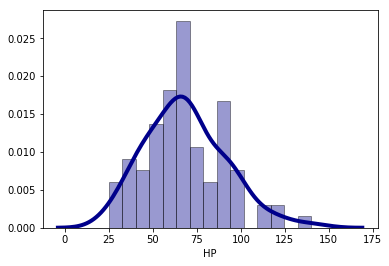

In [78]:
pokemon_density_HP = sns.distplot(pokemon['HP'], hist = True, 
                                  kde=True, bins=15, 
                                  color = 'darkblue', 
                                  hist_kws = {'edgecolor':'black'},
                                  kde_kws={'linewidth': 4})

In [89]:
#calculate standard deviation and mean of each int column
import statistics
print('The average HP is',round(statistics.mean(pokemon['HP'])))
print('The standard deviation for HP is',round(statistics.stdev(pokemon['HP'])))
print('The average Att is',round(statistics.mean(pokemon['Att'])))
print('The standard deviation for Att is',round(statistics.stdev(pokemon['Att'])))
print('The average Def is',round(statistics.mean(pokemon['Def'])))
print('The standard deviation for Def is',round(statistics.stdev(pokemon['Def'])))
print('The average SAtt is',round(statistics.mean(pokemon['SAtt'])))
print('The standard deviation for SAtt is',round(statistics.stdev(pokemon['SAtt'])))
print('The average SDef is',round(statistics.mean(pokemon['SDef'])))
print('The standard deviation for SDef is',round(statistics.stdev(pokemon['SDef'])))
print('The average Spd is',round(statistics.mean(pokemon['Spd'])))
print('The standard deviation for Spd is',round(statistics.stdev(pokemon['Spd'])))
print('The average Sum of Stats is',round(statistics.mean(pokemon['Sum_Of_Stats'])))
print('The standard deviation for Sum of Stats is',round(statistics.stdev(pokemon['Sum_Of_Stats'])))

The average HP is 68
The standard deviation for HP is 23
The average Att is 79
The standard deviation for Att is 31
The average Def is 73
The standard deviation for Def is 28
The average SAtt is 71
The standard deviation for SAtt is 29
The average SDef is 71
The standard deviation for SDef is 27
The average Spd is 67
The standard deviation for Spd is 33
The average Sum of Stats is 430
The standard deviation for Sum of Stats is 122
